In [1]:
%pip install seaborn 
import ast
import pandas as pd 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Note: you may need to restart the kernel to use updated packages.


c:\Users\user\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


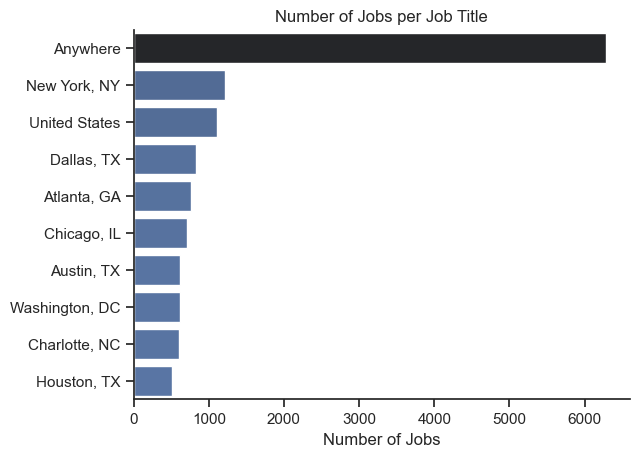

In [2]:
df_da_us = df[(df['job_country']== 'United States') & (df['job_title_short']== 'Data Engineer')]
df_plot = df_da_us['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')

sns.barplot(data=df_plot, x='count', y='job_location', legend=False, hue='count', palette='dark:b_r')
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel("")
plt.show()

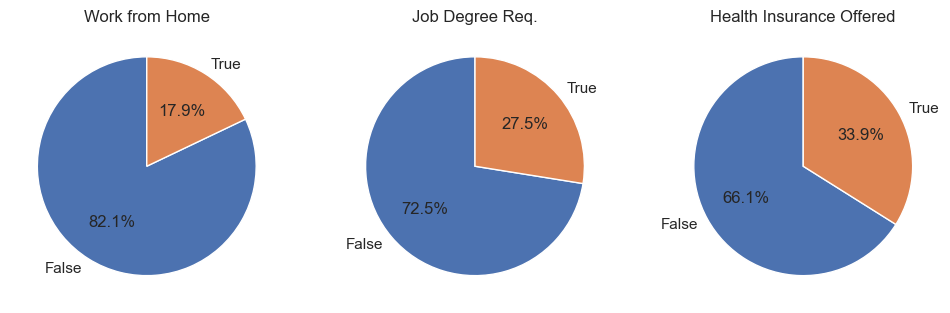

In [3]:
columns = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'    
}
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))
for i, (column, title) in enumerate(columns.items()):
    ax[i].pie(df_da_us[column].value_counts(), startangle = 90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)
plt.show()


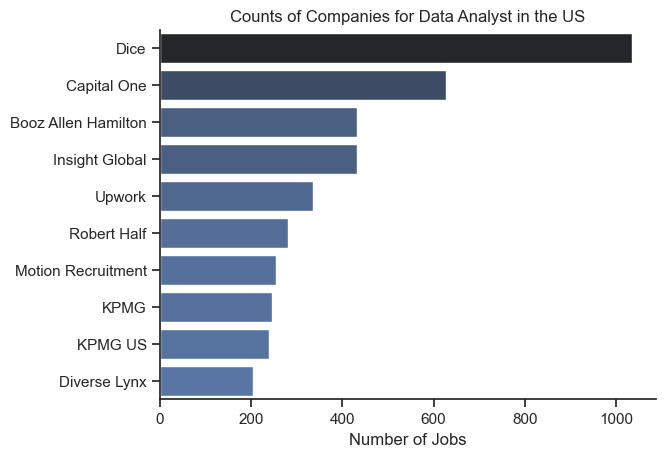

In [4]:
df_plot = df_da_us['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')

sns.barplot(data=df_plot, x='count', y='company_name', legend=False, hue='count', palette='dark:b_r')
sns.despine()
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel("")
plt.show()